In [2]:
import pandas as pd
dataset = [
    ['A', 'D', 5],
    ['A', 'B', 7],
    ['B', 'D', 9],
    ['B', 'C', 8],
    ['B', 'E', 7],
    ['C', 'E', 5],
    ['D', 'E', 15],
    ['D', 'F', 6],
    ['E', 'F', 8],
    ['E', 'G', 9],
    ['F', 'G', 11],
]
df = pd.DataFrame(dataset, columns=['start', 'end', 'distance'])



In [3]:
#pirmas
startingPoint = 'D'
chosenPoints = [startingPoint]
connections = []
while True:
    foundNeighbours = df[(df["start"].isin(chosenPoints) & ~df["end"].isin(chosenPoints)) \
        | ~df["start"].isin(chosenPoints) & df["end"].isin(chosenPoints)] 
    if not len(foundNeighbours):
        break

    closestNeighbour = foundNeighbours.loc[foundNeighbours.distance.idxmin()]
    
    if not closestNeighbour.start in chosenPoints:
        chosenPoints.append(closestNeighbour.start)
        connections.append([closestNeighbour.end, closestNeighbour.start, closestNeighbour.distance])
    elif not closestNeighbour.end in chosenPoints:
        chosenPoints.append(closestNeighbour.end)
        connections.append([closestNeighbour.start, closestNeighbour.end, closestNeighbour.distance])

chosenPoints.sort()
connections = pd.DataFrame(connections, columns=['start', 'end', 'distance'])

print(chosenPoints)
print(connections)

['A', 'B', 'C', 'D', 'E', 'F', 'G']
  start end  distance
0     D   A         5
1     D   F         6
2     A   B         7
3     B   E         7
4     E   C         5
5     E   G         9


In [4]:
#antras
clusterPoints = chosenPoints
clusterConnections = connections
numberOfClusters = 3
for i in range(numberOfClusters - 1):
    clusterConnections = clusterConnections.drop(clusterConnections["distance"].idxmax())

clusterConnections.index = range(len(clusterConnections.index))

foundClusters = []
for index in range(len(clusterConnections)):
    connection = clusterConnections.loc[index]
    
    addedToCluster = False
    for cluster in foundClusters:
        if connection.start in cluster:
            cluster.append(connection.end)
            addedToCluster = True
            break
        elif connection.end in cluster:
            cluster.append(connection.start)
            addedToCluster = True
            break

    if not addedToCluster:
        foundClusters.append([connection.start, connection.end])
    print(foundClusters)

for point in clusterPoints:
    hasCluster = True
    for cluster in foundClusters:
        if not point in cluster:
            hasCluster = False
        if point in cluster:
            hasCluster = True
            break


    if not hasCluster:
        foundClusters.append([point])

print(foundClusters)

[['D', 'A']]
[['D', 'A', 'F']]
[['D', 'A', 'F'], ['B', 'E']]
[['D', 'A', 'F'], ['B', 'E', 'C']]
[['D', 'A', 'F'], ['B', 'E', 'C'], ['G']]


In [36]:
#trecias
import pandas as pd
from scipy.spatial.distance import cdist
import numpy as np
dataset = [
    ["Vardas1", 1, 1, 1, 1, 1, 1, 1, 0, 0, 1],
    ["Vardas2", 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
    ["Vardas3", 1, 0, 1, 0, 0, 0, 1, 0, 0, 1],
    ["Vardas4", 1, 1, 0, 0, 1, 0, 1, 0, 0, 0],
    ["Vardas5", 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
    ["Vardas6", 0, 1, 1, 1, 1, 0, 1, 0, 0, 0],
    ["Vardas7", 0, 0, 1, 0, 0, 1, 1, 0, 0, 0],
    ["Vardas8", 1, 1, 1, 0, 1, 0, 1, 0, 0, 1],
    ["Vardas9", 0, 0, 1, 0, 0, 0, 1, 1, 0, 1],
    ["Vardas10", 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
    ["Vardas11", 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
    ["Vardas12", 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
    ["Vardas13", 1, 0, 1, 1, 1, 1, 1, 0, 0, 1],
    ["Vardas14", 1, 1, 1, 1, 1, 0, 1, 0, 0, 1],
    ["Vardas15", 0, 0, 1, 0, 0, 0, 1, 1, 0, 1],
]

valueColumns = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10']
df = pd.DataFrame(dataset, columns=['pacientas', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10'])
allPoints = df.drop("pacientas", axis=1)

radius = 0.5
error = 0.01

In [39]:
from scipy.spatial import distance

centers = pd.DataFrame([], columns=valueColumns)
points = allPoints
while len(points):
    current_point = points.sample(n = 1)
    current_point_index = current_point.index.values[0]

    distances = pd.DataFrame(cdist(points, points, 'euclidean'))
    distancesToPoint = distances[current_point_index]
    neighboursIndexes = [index for index, distance in enumerate(distancesToPoint) if distance < radius]
    neighbours = points.loc[neighboursIndexes]
    center = [np.mean(neighbours[column].values) for column in neighbours]

    while distance.euclidean(current_point, center) > error:
        current_point = pd.DataFrame([center], columns=valueColumns)
        pointsWithCenter = points.append(current_point, ignore_index = True)
        current_point_index = len(pointsWithCenter) - 1
        distances = pd.DataFrame(cdist(pointsWithCenter, pointsWithCenter, 'euclidean'))
        distancesToPoint = distances[current_point_index]
        neighboursIndexes = [index for index, distance in enumerate(distancesToPoint) if distance < radius]
        neighbours = pointsWithCenter.loc[neighboursIndexes]

        center = [np.mean(neighbours[column].values) for column in neighbours]
        neighbours = neighbours.drop(current_point_index)

    points = points.drop(neighbours.index.values)
    points.index = range(len(points.index))
    centers = centers.append(current_point)
print('centers')
print(centers)


centers
   p1 p2 p3 p4 p5 p6 p7 p8 p9 p10
6   0  0  1  0  0  1  1  0  0   0
12  1  1  1  1  1  0  1  0  0   1
11  1  0  1  1  1  1  1  0  0   1
2   1  0  1  0  0  0  1  0  0   1
3   0  0  1  0  0  0  0  0  1   0
1   1  1  1  1  1  1  1  0  0   0
2   0  1  1  1  1  0  1  0  0   0
1   1  1  0  0  1  0  1  0  0   0
1   1  1  1  0  1  0  1  0  0   1
1   0  0  1  0  0  0  1  1  0   1
2   1  1  1  1  1  1  1  1  0   0
1   1  1  1  1  1  1  1  0  1   1
0   1  1  1  1  1  1  1  0  0   1


In [40]:
clusters = []
centers.index = range(len(centers.index))

for index in range(len(centers)):
    points = allPoints
    center = centers.loc[[index]].values[0]
    current_point = pd.DataFrame([center], columns=valueColumns)
    current_point = pd.DataFrame(current_point, columns=valueColumns)

    pointsWithCenter = points.append(current_point, ignore_index = True)
    current_point_index = len(pointsWithCenter) - 1
    
    distances = pd.DataFrame(cdist(pointsWithCenter, pointsWithCenter, 'euclidean'))
    distancesToPoint = distances[current_point_index]
    neighboursIndexes = [index for index, distance in enumerate(distancesToPoint) if distance < radius]

    neighbours = df.loc[neighboursIndexes[:-1]]
    print(neighbours.pacientas.values)
    print('----')
    clusters.append(neighbours.pacientas.values)

['Vardas7']
----
['Vardas14']
----
['Vardas13']
----
['Vardas3']
----
['Vardas5' 'Vardas10']
----
['Vardas2']
----
['Vardas6']
----
['Vardas4']
----
['Vardas8']
----
['Vardas9' 'Vardas15']
----
['Vardas12']
----
['Vardas11']
----
['Vardas1']
----


In [8]:
#ketvirtas
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
x = allPoints.values.tolist()
clustering = DBSCAN(eps=0.8, min_samples=2, metric='euclidean').fit(x)
print(clustering.labels_)

clusters = {}
for index, label in enumerate(clustering.labels_):
    name = df.loc[[index]].values[0][0]
    if not clusters.get(label):
        clusters[label] = [name]
    else:
        temp = clusters[label]
        temp.append(name)
        clusters[label] = temp
print(clusters)

[-1 -1 -1 -1  0 -1 -1 -1  1  0 -1 -1 -1 -1  1]
{-1: ['Vardas1', 'Vardas2', 'Vardas3', 'Vardas4', 'Vardas6', 'Vardas7', 'Vardas8', 'Vardas11', 'Vardas12', 'Vardas13', 'Vardas14'], 0: ['Vardas5', 'Vardas10'], 1: ['Vardas9', 'Vardas15']}


In [9]:
#penktas
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
x = allPoints.values.tolist()
kmeans = KMeans(n_clusters=3).fit(x)
kmeans.labels_

clusters = {}
for index, label in enumerate(kmeans.labels_):
    name = df.loc[[index]].values[0][0]
    if not clusters.get(label):
        clusters[label] = [name]
    else:
        temp = clusters[label]
        temp.append(name)
        clusters[label] = temp
print(clusters)

{1: ['Vardas1', 'Vardas2', 'Vardas4', 'Vardas6', 'Vardas8', 'Vardas11', 'Vardas12', 'Vardas13', 'Vardas14'], 0: ['Vardas3', 'Vardas7', 'Vardas9', 'Vardas15'], 2: ['Vardas5', 'Vardas10']}


c:\Users\laimo\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


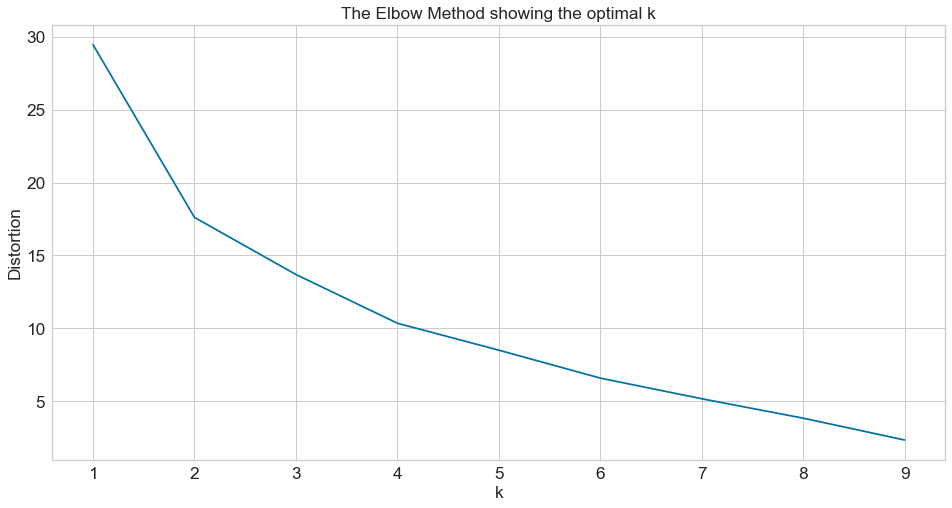

In [26]:

#sesta
distortions = []
K = range(1,10)
x = allPoints.values.tolist()
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(x)
    distortions.append(kmeanModel.inertia_)

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

plt.show()

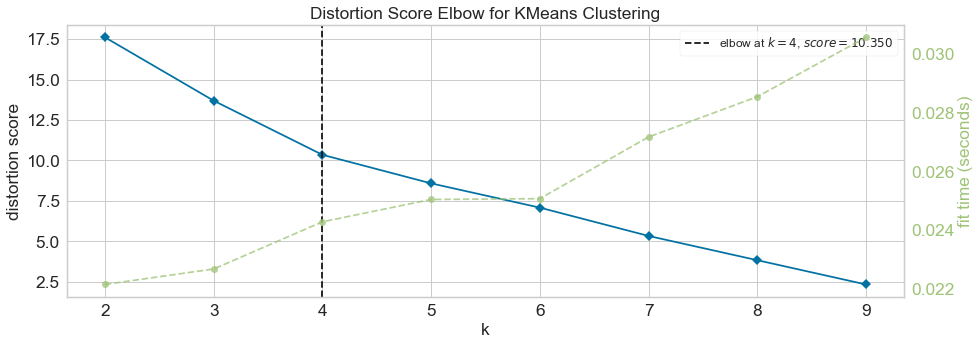

KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=9), k=(2, 10))

In [33]:
from yellowbrick.cluster.elbow import kelbow_visualizer
x = allPoints.values

kelbow_visualizer(KMeans(), x, k=(2,10))


[-1 -1 -1 -1  0 -1 -1 -1  1  0 -1 -1 -1 -1  1]
[2.75753145 2.46993024 1.53595385 1.4871001  0.50796907 1.87184223
 1.13516793 2.21703162 1.26737283 0.50796907 2.8231702  2.55698559
 2.43783286 2.5150798  1.26737283]


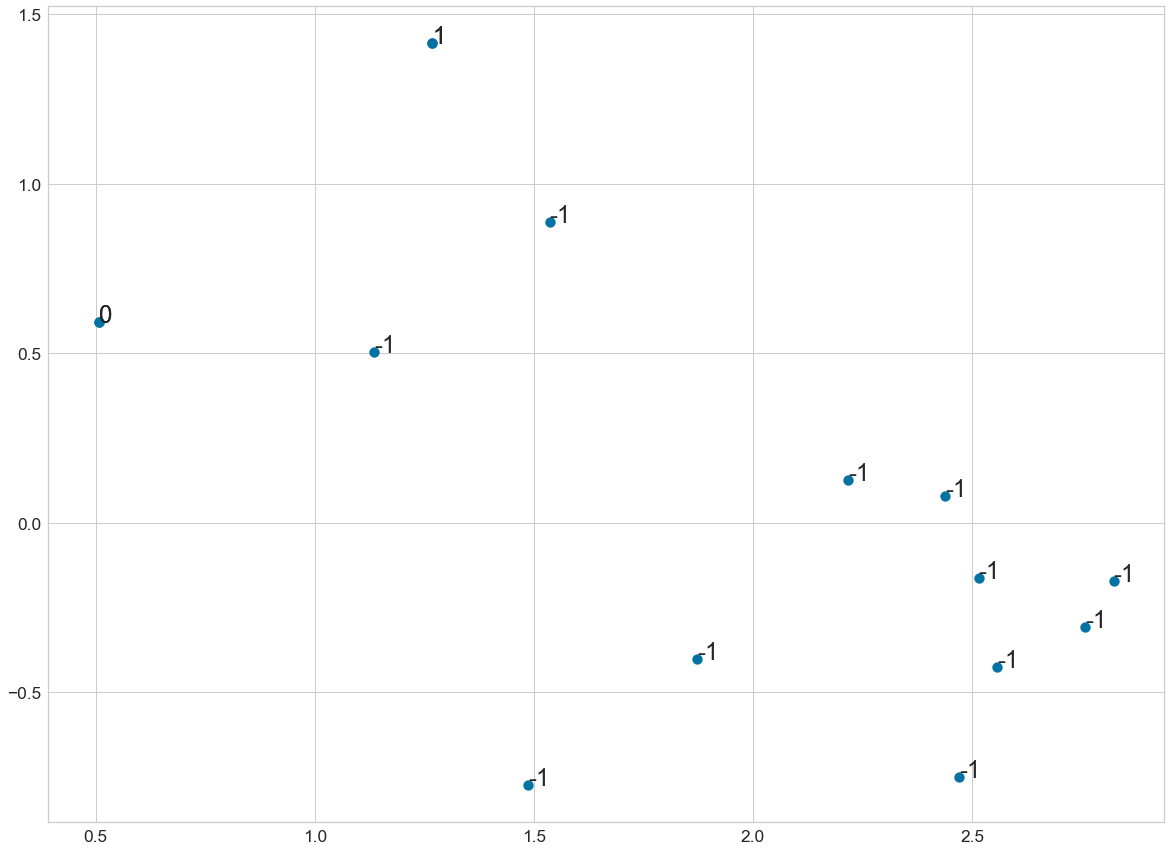

In [35]:
#septinta
x = allPoints.values.tolist()
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components = 2)
x_transformed = svd.fit_transform(x)
clustering = DBSCAN(eps=0.8, min_samples=2, metric='euclidean').fit(x) # min_samples
# objektų skaičius kaiminystėje, norint, kad taškas būtų laikomas šakniniu;
#eps- Didžiausias atstumas tarp dviejų objektų, kad vienas būtų laikomas šalia kito.

plt.subplots(figsize=(20, 15))
plt.scatter(x_transformed[:, 0], x_transformed[:, 1], s=100,cmap='viridis')
for index, label in enumerate(clustering.labels_):
    plt.annotate(label, (x_transformed[:, 0][index], x_transformed[:, 1][index]), fontsize=24)

[1 1 0 1 2 1 0 1 0 2 1 1 1 1 0]
[2.75753145 2.46993024 1.53595385 1.4871001  0.50796907 1.87184223
 1.13516793 2.21703162 1.26737283 0.50796907 2.8231702  2.55698559
 2.43783286 2.5150798  1.26737283]


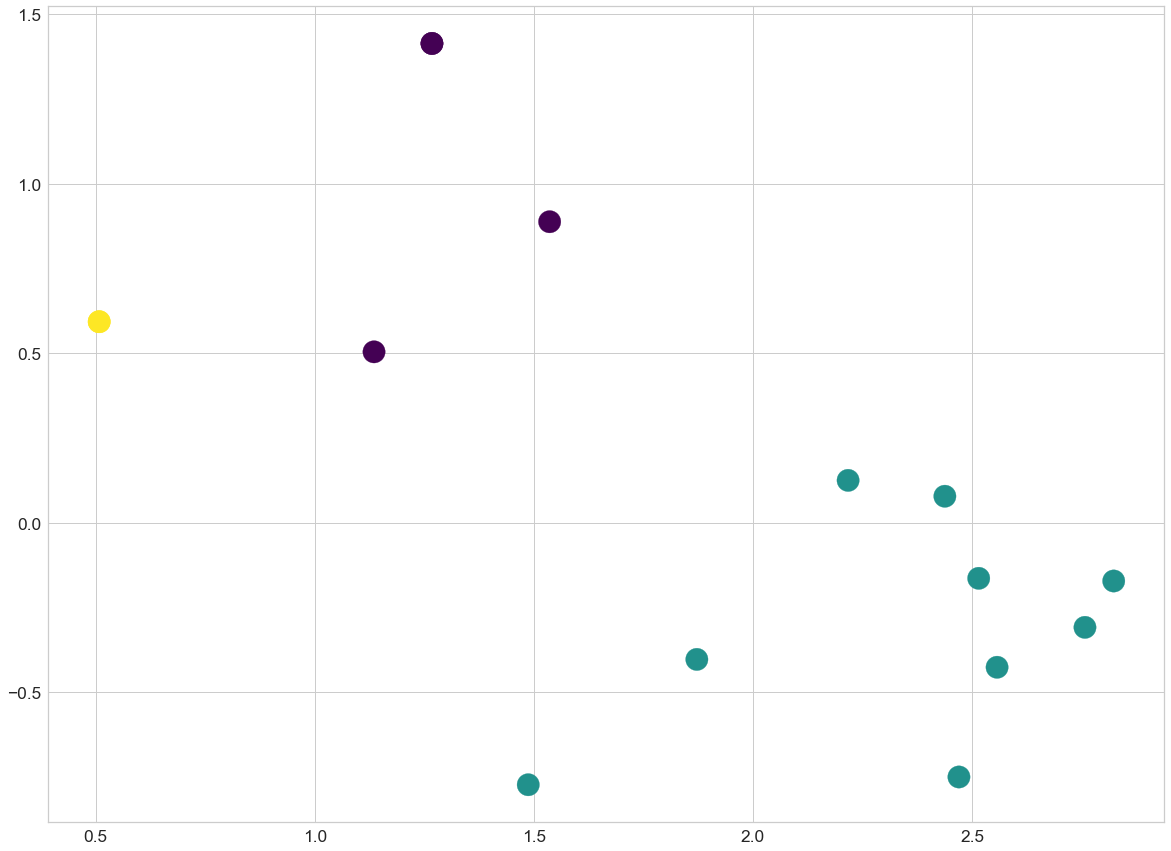

In [34]:
#septinta
x = allPoints.values.tolist()
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components = 2)
x_transformed = svd.fit_transform(x)
kmeans = KMeans(n_clusters=3).fit(x)
kmeans.labels_

plt.subplots(figsize=(20, 15))
plt.scatter(x_transformed[:, 0], x_transformed[:, 1], c=kmeans.labels_, s=500, cmap='viridis')